Try some integrals over G_0(q,q) = (alpha+ c q^2)

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = '15'


In [2]:
cutoff_length=.1

In [3]:
l= 2*math.pi/100

In [4]:
fine=1
def int_G(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= l/cutoff_length
    maxqsquared=((maxq-1)*2/math.sqrt(math.pi))**2
    #make sure to get a circle, not a square
    for qx in range(-math.floor(maxq)+fine,math.floor(maxq)):
        for qy in range(-math.floor(maxq)+fine,math.floor(maxq)):
            sum_+=1/(alpha+c*(qx**2+qy**2))
    return sum_

def int_G_circlelimit(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= l/cutoff_length
    maxqsquared=((maxq-1)*2/math.sqrt(math.pi))**2
    #make sure to get a circle, not a square
    for qx in range(-math.floor(maxq)+fine,math.floor(maxq)):
        for qy in range(-math.floor(maxq)+fine,math.floor(maxq)):
            qsquared=qx**2+qy**2
            if qsquared <= maxqsquared:
                sum_+=(1/(alpha+c*(qx**2+qy**2)))
    return sum_
 
def int_G2(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= l/cutoff_length
    #integrating over d-1 dimensions -> Kd = Omega / 2pi^2,
    #leaving just 1D integral in q
    for qx in range(0,math.floor(maxq*2/math.sqrt(math.pi))):
        sum_+=qx/(alpha+c*qx**2)
    return sum_*2*math.pi
                

12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192


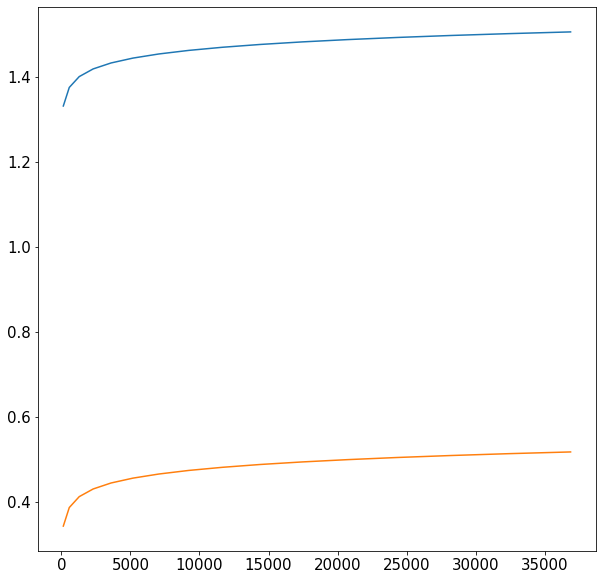

In [6]:
ls=[x for x in range(12,200,12)]
ints=[]
ints2=[]

c=100

for l in ls:
    print(l)
    ints.append(int_G(cutoff_length, l, c=c))
for l in ls:
    ints2.append(int_G2(cutoff_length, l, c=c))

plt.plot([l**2 for l in ls], ints)
plt.plot([l**2 for l in ls], ints2)

NameError: name 'ls2' is not defined

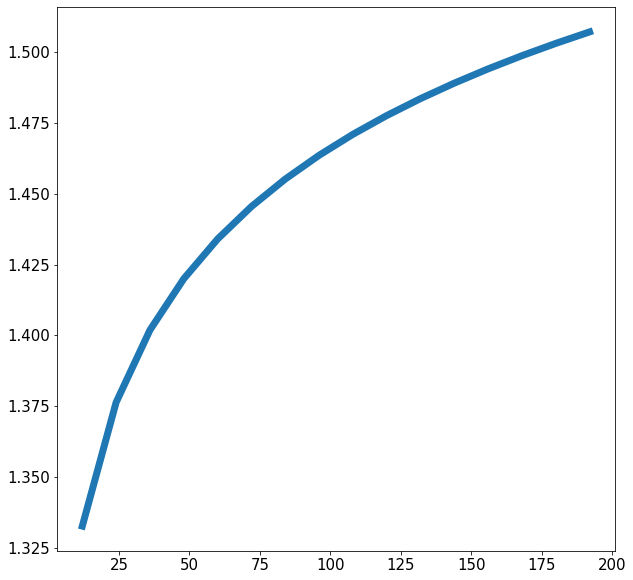

In [7]:
plt.plot([l for l in ls], ints, label="numerically integrated over square domain", linewidth=7)
plt.plot([l for l in ls2], ints2, label="numerically integrated radial formula", linewidth=5, linestyle='--')
plt.plot([l for l in ls2], [math.log(1+c*(math.floor(l/cutoff_length*2/math.sqrt(math.pi))-1+.5)**2)*2*math.pi/(2*c)-math.log(1+.5**2*c)*2*math.pi/(2*c) for l in ls2], 
        linewidth=3, linestyle=':',label="log formula", color='black')
plt.legend()
plt.title("comparing square domain and circular formula results, c="+str(c))
plt.ylabel("\int G0 dq")
plt.xlabel("cell length l")
#plt.savefig("/home/jsk/Documents/phd/squaredomainc100_point5start.png")
plt.show()

In [ ]:
def int_Gsquared(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= l/cutoff_length
    maxqsquared=maxq**2
    #make sure to get a circle, not a square
    for qx in range(-math.floor(maxq)+1,math.floor(maxq)):
        for qy in range(-math.floor(maxq)+1,math.floor(maxq)):
            qsquared=qx**2+qy**2
            if qsquared<=maxqsquared and qsquared !=0:
                sum_+=(1/(alpha+c*qsquared))**2
    return sum_
 

In [ ]:
plt.plot(ls, [int_Gsquared(cutoff_length, l, c=1) for l in ls])

In [ ]:
#try a momentum space square instead of circle
def int_G_square(cutoff_length, l, alpha=1, c=1):
    sum_=0
    maxq= l/cutoff_length
    maxqsquared=maxq**2
    for qx in range(-math.floor(maxq)+1,math.floor(maxq)):
        for qy in range(-math.floor(maxq)+1,math.floor(maxq)):
            qsquared=qx**2+qy**2
            if qsquared !=0:
                sum_+=1/(alpha+c*qsquared)
    return sum_

In [ ]:

ints3=[]
for l in ls:
    #print(l)
    ints3.append(int_G_square(cutoff_length, l, c=c))

plt.plot([l**2 for l in ls], ints)
plt.plot([l**2 for l in ls], ints3)

In [ ]:
#try momentum space rectangle

def int_G_rect(cutoff_length, lx, ly, alpha=1, c=1):
    sum_=0
    maxq_x= lx/cutoff_length
    maxq_y= ly/cutoff_length
    for qx in range(-math.floor(maxq_x)+1,math.floor(maxq_x)):
        for qy in range(-math.floor(maxq_y)+1,math.floor(maxq_y)):
            if not (qx ==0 and qy==0):
                sum_+=1/(alpha+c*(qy**2+qx**2))
    return sum_

In [ ]:
ints_rect={}
aspect_ratio=[1,2, 10, 50, 100, 200, 500]
for ar in aspect_ratio:
    ls_x=[l*math.sqrt(ar) for l in ls]
    ls_y=[l/math.sqrt(ar) for l in ls] #these rectangles have same area as original square
    ints_rect[ar]=[]
    for lx,ly in zip(ls_x, ls_y):
        ints_rect[ar].append(int_G_rect(cutoff_length, lx,ly, c=c))


In [ ]:
        
plt.plot([l**2 for l in ls], ints)
plt.plot([l**2 for l in ls], ints3)
for ar in aspect_ratio:
    maxq_x= [math.floor(l*math.sqrt(ar)/cutoff_length) for l in ls]
    maxq_y= [math.floor(l/(math.sqrt(ar)*cutoff_length)) for l in ls]
    plt.plot([(qx*qy) for qx,qy in zip(maxq_x, maxq_y)], ints_rect[ar], label=str(ar))
    #analytical answer: integrate arctan(sqrt(c) qx/(sqrt(a+cqy**2)))/(sqrt(a+cqy**2)

plt.legend()
plt.show()

The discrepancy is because of diffferences in square-pixelated 2D numerical 'integration' around 0 vs looking at the function around 0 more smoothly in the radial direction, as is done by both 1D numerical integral and the analytic formula.  The discrepance is actually not caused by differences on the outside/corners of a square/circle with similar area.  We can see this by cutting out a disc in the middle, or by taking square integral to very fine pixellation.  The error is with the numerical square we look at for comparison.

In practice the problem around the center q=0 doesn't matter: we want the q-space integral over a ring from radius Qmin to Qmax (isotropic cases).
(anisotrpic cases: we take the thicker ring smaller Qmin to Qmax, then take out rectangualr overshoot of the central (empty) rectangle)

In [ ]:
#approximate rectangular q-space cells by the central square
def int_G_rect_approx(cutoff_length, lx, ly, alpha=1, c=1):
    sum_=0
    maxq_x= lx/cutoff_length
    maxq_y= ly/cutoff_length
    maxq=min(maxq_x, maxq_y)
    for qx in range(-math.floor(maxq)+1,math.floor(maxq)):
        for qy in range(-math.floor(maxq)+1,math.floor(maxq)):
            if not (qx ==0 and qy==0):
                sum_+=1/(alpha+c*(qy**2+qx**2))
    return sum_

In [ ]:
#approximate rectangular q-space cells by the central circle plus a bit
def int_G_rect_approx2(cutoff_length, lx, ly, alpha=1, c=1):
    sum_=0
    maxq_x= math.floor(lx/cutoff_length)
    maxq_y= math.floor(ly/cutoff_length)
    maxq=min(maxq_x, maxq_y)
    maxqsquared=(maxq-1)**2*1.28 #even better circle approximation? radius *1.286 so its area is eaqual to sqyare
    longer_maxq=max(maxq_x, maxq_y)
    for qx in range(-math.floor(maxq)+1,math.floor(maxq)):
        for qy in range(-math.floor(maxq)+1,math.floor(maxq)):
            qsquared=qx**2+qy**2
            if qsquared<=maxqsquared and qsquared !=0:
                sum_+=1/(alpha+c*qsquared)
    #integral between max_q and longer_maxq of 1/(alpha+c*(qy**2+qx**2))
    # with qy fixed 0
    sides = 0
    side_width = len(range(-maxq+1,maxq))
    for qx in range(maxq, longer_maxq):
        if qx!=0:
            sides+=1/(alpha+c*(qx**2))
    print(sum_, sides)
    sum_+=2*sides*side_width
    return sum_

#this one works ok even for c=1

In [ ]:
#approximate rectangular q-space cells by the central square plus a bit
def int_G_rect_approx3(cutoff_length, lx, ly, alpha=1, c=1):
    sum_=0
    maxq_x= math.floor(lx/cutoff_length)
    maxq_y= math.floor(ly/cutoff_length)
    maxq=min(maxq_x, maxq_y)
    longer_maxq=max(maxq_x, maxq_y)
    for qx in range(-maxq+1,maxq):
        for qy in range(-maxq+1,maxq):
            if not (qx ==0 and qy==0):
                sum_+=1/(alpha+c*(qy**2+qx**2))
    #integral between max_q and longer_maxq of 1/(alpha+c*(qy**2+qx**2))
    # with qy fixed 0
    sides = 0
    side_width = len(range(-maxq+1,maxq))
    for qx in range(maxq, longer_maxq):
        if qx!=0:
            sides+=1/(alpha+c*(qx**2))
    print(sum_, sides)
    sum_+=2*sides*side_width
    return sum_

#this one works ok for high c

In [ ]:
ints_rect_approx={}
for ar in aspect_ratio:
    ls_x=[l*math.sqrt(ar) for l in ls]
    ls_y=[l/math.sqrt(ar) for l in ls] #these rectangles have same area as original square
    ints_rect_approx[ar]=[]
    for lx,ly in zip(ls_x, ls_y):
        ints_rect_approx[ar].append(int_G_rect_approx(cutoff_length, lx,ly, c=c))


In [ ]:
ints_rect_approx2={}
ints_rect_approx3={}
for ar in aspect_ratio:
    ls_x=[l*math.sqrt(ar) for l in ls]
    ls_y=[l/math.sqrt(ar) for l in ls] #these rectangles have same area as original square
    ints_rect_approx2[ar]=[]
    ints_rect_approx3[ar]=[]
    for lx,ly in zip(ls_x, ls_y):
        ints_rect_approx2[ar].append(int_G_rect_approx2(cutoff_length, lx,ly, c=c))
        ints_rect_approx3[ar].append(int_G_rect_approx3(cutoff_length, lx,ly, c=c))

In [ ]:
#plt.plot([l**2 for l in ls], ints)
#plt.plot([l**2 for l in ls], ints3)
cols1 = dict( [(ar, plt.cm.autumn(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
cols2 = dict( [(ar, plt.cm.winter(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
cols3 = dict( [(ar, plt.cm.copper(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
for ar in aspect_ratio:
    maxq_x= [math.floor(l*math.sqrt(ar)/cutoff_length) for l in ls]
    maxq_y= [math.floor(l/(math.sqrt(ar)*cutoff_length)) for l in ls]
    plt.plot([qx*qy for qx,qy in zip(maxq_x, maxq_y)], ints_rect[ar], label=str(ar), linewidth=5, color=cols1[ar])
    plt.plot([qx*qy for qx,qy in zip(maxq_x, maxq_y)], ints_rect_approx2[ar], label=str(ar), linewidth=2, color=cols2[ar], linestyle='--')
    plt.plot([qx*qy for qx,qy in zip(maxq_x, maxq_y)], ints_rect_approx3[ar], label=str(ar), linewidth=7, color=cols3[ar], linestyle=':')
    #analytical answer: integrate arctan(sqrt(c) qx/(sqrt(a+cqy**2)))/(sqrt(a+cqy**2)

plt.legend(title="aspect ratio")
plt.title("correction on rectangular domain")
plt.xlabel("cell area lx*ly")
plt.ylabel("correction \int G0 dq")
#plt.savefig("rect_approx_c"+str(c)+"_a.png")

In [ ]:
cols1 = dict( [(ar, plt.cm.autumn(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
cols2 = dict( [(ar, plt.cm.winter(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
cols3 = dict( [(ar, plt.cm.copper(i/len(aspect_ratio))) for i,ar in enumerate(aspect_ratio)])
for ar in aspect_ratio:
    maxq_x= [math.floor(l*math.sqrt(ar)/cutoff_length) for l in ls]
    maxq_y= [math.floor(l/(math.sqrt(ar)*cutoff_length)) for l in ls]
    plt.plot([qy for qx,qy in zip(maxq_x, maxq_y)], ints_rect[ar], label=str(ar), linewidth=5, color=cols1[ar])
    plt.plot([qy for qx,qy in zip(maxq_x, maxq_y)], ints_rect_approx2[ar], label=str(ar), linewidth=2, color=cols2[ar], linestyle='--')
    plt.plot([qy for qx,qy in zip(maxq_x, maxq_y)], ints_rect_approx3[ar], label=str(ar), linewidth=7, color=cols3[ar], linestyle=':')
    #analytical answer: integrate arctan(sqrt(c) qx/(sqrt(a+cqy**2)))/(sqrt(a+cqy**2)

plt.legend(title="aspect ratio")
plt.title("correction on rectangular domain")
plt.xlabel("shorter cell dimension ly")
plt.ylabel("correction \int G0 dq")
#plt.savefig("rect_approx_c"+str(c)+"_b.png")

The approximation is extremely close even for aspect ratio 200.
We will use \int^{min(Qx, Qy)} G(q,q) for rectangular cells.  

Because the analytic expression for the square/circular case
is known.

In [ ]:
math.sqrt(1/
          .001)

In [ ]:
5000/math.sqrt(1000)